In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from sympy import *
import sympy as sy


newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [17]:
def loc2glob(k,alpha):
    return k+alpha

def initialize_elements(M=9):
    Xk = np.linspace(0,1,M)#np.array([0, 0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
    Mi = len(Xk)                     # Number of nodes
    T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
    H = Xk[1:]-Xk[:-1]               # Element sizes
    Mk = Mi-1
    return Xk, Mi, T, H, Mk 

def initialize_ABC(alpha,b,c):
    Ak = np.array([[1,-1],[-1,1]])*alpha
    Bk=np.array([[-1/2,-1/2],[1/2,1/2]])*-b
    Ck=np.array([[1/3,1/6 ],[1/6,1/3]])*c
    return Ak, Bk, Ck

def initialize_eqsys(Ak,Bk,Ck,Mi,Mk,H,fk):
    A = np.zeros((Mi,Mi))
    f = np.zeros((Mi))

    for k in range(0,Mk):
        for delta in range(2):
            i = loc2glob(k,delta)
            for epsilon in range(2):
                j = loc2glob(k,epsilon)
                A[i,j] += Ak[delta,epsilon]/H[k]
                A[i,j] += Bk[delta,epsilon]
                A[i,j] += Ck[delta,epsilon]*H[k]
            f[i] += fk[delta]*H[k]
    return A,f

In [18]:
def solver():
    alpha=0.5
    b=1
    c=2

    fk = np.array([1/2,1/2])   # f=1
    Xk, Mi, T, H, Mk = initialize_elements()
    Ak, Bk, Ck = initialize_ABC(alpha,b,c)

    A,f = initialize_eqsys(Ak,Bk,Ck,Mi,Mk,H,fk)

    #print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))

    # Impose boundary condition
    # Dirichlet boundary conditions
    A[0,:] = 0
    A[0,0] = 1
    f[0] = 0
    A[-1,:] = 0
    A[-1,-1] = 1
    f[-1] = 0
    print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))

    

    U = np.linalg.solve(A,f)

    return U, Xk

In [19]:
def plotter(U, Xk):
    plt.plot(Xk,U)
    plt.legend(['Numerical'])
    plt.xlabel('x')
    plt.savefig('ex.pdf')
    plt.show()
    return 0

A=
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-4.5  8.2 -3.5  0.   0.   0.   0.   0.   0. ]
 [ 0.  -4.5  8.2 -3.5  0.   0.   0.   0.   0. ]
 [ 0.   0.  -4.5  8.2 -3.5  0.   0.   0.   0. ]
 [ 0.   0.   0.  -4.5  8.2 -3.5  0.   0.   0. ]
 [ 0.   0.   0.   0.  -4.5  8.2 -3.5  0.   0. ]
 [ 0.   0.   0.   0.   0.  -4.5  8.2 -3.5  0. ]
 [ 0.   0.   0.   0.   0.   0.  -4.5  8.2 -3.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1. ]] 

 f= [0.  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0. ]


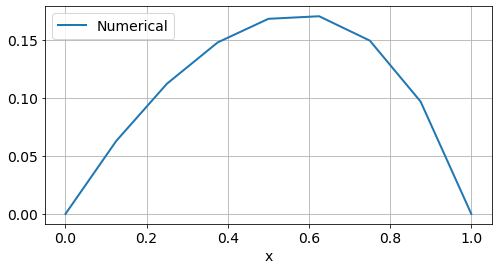

0

In [20]:
def main():
    U, Xk = solver()
    plotter(U,Xk)

    return 0

main()

In [21]:
def initialize_elements2(M):
    Xk =np.linspace(0,1,M) #np.array([0, 0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
    Mi = len(Xk)                     # Number of nodes
    T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
    H = Xk[1:]-Xk[:-1]               # Element sizes
    Mk = Mi-1
    return Xk, Mi, T, H, Mk 

def fk1(x_k,x_l):
    return np.array([1-x_k**2,1-x_l**2])

def initialize_eqsys2(Ak,Bk,Ck,Mi,Mk,H,Xk):
    A = np.zeros((Mi,Mi))
    f = np.zeros((Mi))

    for k in range(0,Mk):
        for delta in range(2):
            i = loc2glob(k,delta)
            for epsilon in range(2):
                j = loc2glob(k,epsilon)
                A[i,j] += Ak[delta,epsilon]/H[k]
                A[i,j] += Bk[delta,epsilon]
                A[i,j] += Ck[delta,epsilon]*H[k]
            fk=fk1(Xk[k],Xk[k+1])
            f[i] += fk[delta]*H[k]
    return A,f

In [22]:
def solver2(M):
    alpha=0.5
    b=1
    c=2

    #fk = 1/2* np.array([1-x_k^2,1-x_(k+1)^2])   # f=1
    Xk, Mi, T, H, Mk = initialize_elements2(M)
    Ak, Bk, Ck = initialize_ABC(alpha,b,c)
    #fk=initialize_fk()

    A,f = initialize_eqsys2(Ak,Bk,Ck,Mi,Mk,H,Xk)

    #print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))

    # Impose boundary condition
    # Dirichlet boundary conditions
    A[0,:] = 0
    A[0,0] = 1
    f[0] = 0
    A[-1,:] = 0
    A[-1,-1] = 1
    f[-1] = 0
    print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))   
    U = np.linalg.solve(A,f)
    U_der=np.zeros(M-1)
    for i in range(M-1):
        U_der[i]=(U[i+1]-U[i])/H[i]
    print(U)
    return U, Xk, U_der


In [23]:
def plotter2(U, Xk):
    plt.plot(Xk,U,Xk, Xk*(1-Xk),'o')
    plt.legend(['Numerical','Exact'])
    plt.xlabel('x');
    plt.savefig('2a')

    plt.show()
    return 0


A=
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-4.5  8.2 -3.5  0.   0.   0.   0.   0.   0. ]
 [ 0.  -4.5  8.2 -3.5  0.   0.   0.   0.   0. ]
 [ 0.   0.  -4.5  8.2 -3.5  0.   0.   0.   0. ]
 [ 0.   0.   0.  -4.5  8.2 -3.5  0.   0.   0. ]
 [ 0.   0.   0.   0.  -4.5  8.2 -3.5  0.   0. ]
 [ 0.   0.   0.   0.   0.  -4.5  8.2 -3.5  0. ]
 [ 0.   0.   0.   0.   0.   0.  -4.5  8.2 -3.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1. ]] 

 f= [0.  0.2 0.2 0.2 0.2 0.2 0.1 0.1 0. ]
[-4.48239576e-16  1.10028865e-01  1.88667560e-01  2.35912690e-01
  2.51749498e-01  2.36147515e-01  1.89053815e-01  1.10382695e-01
  0.00000000e+00]


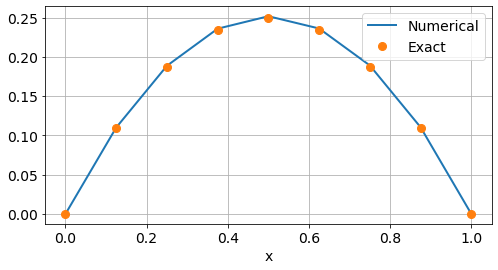

0

In [24]:
def main2():
    U, Xk, U_der = solver2(M=9)
    plotter2(U,Xk)

    return 0

main2()

A=
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-4.5  8.2 -3.5  0.   0.   0.   0.   0.   0. ]
 [ 0.  -4.5  8.2 -3.5  0.   0.   0.   0.   0. ]
 [ 0.   0.  -4.5  8.2 -3.5  0.   0.   0.   0. ]
 [ 0.   0.   0.  -4.5  8.2 -3.5  0.   0.   0. ]
 [ 0.   0.   0.   0.  -4.5  8.2 -3.5  0.   0. ]
 [ 0.   0.   0.   0.   0.  -4.5  8.2 -3.5  0. ]
 [ 0.   0.   0.   0.   0.   0.  -4.5  8.2 -3.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1. ]] 

 f= [0.  0.2 0.2 0.2 0.2 0.2 0.1 0.1 0. ]
[-4.48239576e-16  1.10028865e-01  1.88667560e-01  2.35912690e-01
  2.51749498e-01  2.36147515e-01  1.89053815e-01  1.10382695e-01
  0.00000000e+00]
A=
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [-9.  17.1 -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [ 0.  -9.  17.1 -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [ 0.   0.  -9.  17.1 -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0

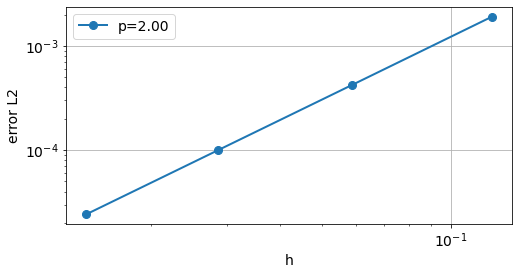

0

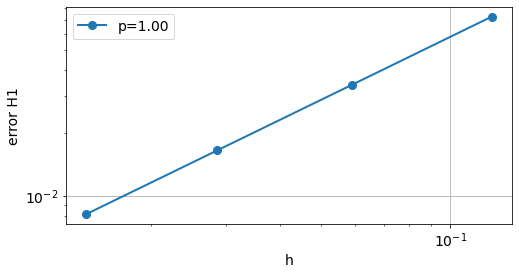

In [25]:
def u_exact(M):
    Xk=np.linspace(0,1,M)
    uex=np.zeros(M)
    for i in range(len(Xk)):
        uex[i]=Xk[i]*(1-Xk[i])
    return uex

def u_exact_prime(M):
    Xk=np.linspace(0,1,M)
    uex_prime=np.zeros(M)
    for i in range(len(Xk)):
        uex_prime[i]=1-2*Xk[i]
    return uex_prime
#L2-norm

def convergence_d():
    P = 4
    Hconv = np.zeros(P)
    Econv = np.zeros(P)
    EH1=np.zeros(P)
    M = 9
    for p in range(P):
        U,Xk, U_der = solver2(M)
        uex = u_exact(M)
        Eh = u_exact(M) - U
        Hconv[p] = (Xk[1]-Xk[0])
        #pols = np.zeros(M-1)
        ErrL2 = 0
        x=Symbol('x')

        Med = np.zeros(M-1)
        
        for i in range(M-1):
            #pols[i] = (U_der[i] * x + (U[i]-U_der[i]*Xk[i]) - x*(1-x))**2
            Med[i] = sy.integrate((U_der[i] * x + (U[i]-U_der[i]*Xk[i]) - x*(1-x))**2, (x, Xk[i], Xk[i+1]))
            ErrL2 += Med[i]
            #print(ErrL2)
        
       
        Econv[p] = np.sqrt(ErrL2)
        
        Mid = np.zeros(M-1)
        x=Symbol('x')
        for i in range(M-1):
            #print(a)
            Mid[i] = sy.integrate((U_der[i] - (1-2*x))**2 , (x, Xk[i], Xk[i+1]))
        andr = 0
        for k in range(M-1):
            andr += Mid[k]
        
        EH1[p]= np.sqrt(Econv[p]**2 + andr)
        
        M = 2*M
        
    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0]
    orderH1=np.polyfit(np.log(Hconv),np.log(EH1),1)[0]
    
    return Hconv, Econv, order, EH1, orderH1

def conv_plot_d():
    H, E, p, EH1, p2 = convergence_d()
    #print(p)
    plt.loglog(H,E, 'o-', label='p={:.2f}'.format(p))
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('error L2')
    plt.legend()
    plt.savefig('L2.pdf')

    plt.show()
    plt.loglog(H,EH1, 'o-', label='p={:.2f}'.format(p2))
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('error H1')

    plt.legend()
    plt.savefig('H1.pdf')


def main_d():
    M = 5

    conv_plot_d()
    
    return 0

main_d()

A=
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-4.5  8.2 -3.5  0.   0.   0.   0.   0.   0. ]
 [ 0.  -4.5  8.2 -3.5  0.   0.   0.   0.   0. ]
 [ 0.   0.  -4.5  8.2 -3.5  0.   0.   0.   0. ]
 [ 0.   0.   0.  -4.5  8.2 -3.5  0.   0.   0. ]
 [ 0.   0.   0.   0.  -4.5  8.2 -3.5  0.   0. ]
 [ 0.   0.   0.   0.   0.  -4.5  8.2 -3.5  0. ]
 [ 0.   0.   0.   0.   0.   0.  -4.5  8.2 -3.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   1. ]] 

 f= [ 0.   0.4  0.5  0.6 -0.2 -0.4 -0.5 -0.6  0. ]
[ 4.98043974e-17  1.46886021e-01  2.38429640e-01  2.29101268e-01
  5.29141810e-02 -9.81042917e-02 -1.91448898e-01 -1.81046082e-01
  0.00000000e+00]
A=
 [[ 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [-9.  17.1 -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [ 0.  -9.  17.1 -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. ]
 [ 0.   0.  -9.  17.1 -8.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.

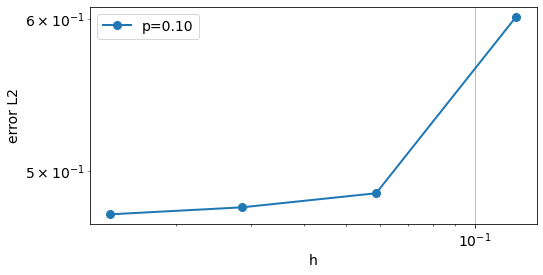

0

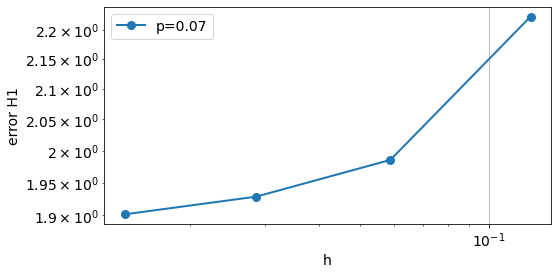

In [33]:
def fkd(x1,x2,b,c):
    if x1>=1/2:
        return np.array([-2*b-4*c*x1+2*c,-2*b-4*c*x2+2*c])*1/2 
    elif x2>=1/2:
        return np.array([2*(b+2*c*x1),-2*b-4*c*x2+2*c])*1/2 
    else:
        return np.array([2*(b+2*c*x1),2*(b+2*c*x2)])*1/2 


def initialize_eqsysd(Ak,Bk,Ck,Mi,Mk,H,Xk, b, c):
    A = np.zeros((Mi,Mi))
    f = np.zeros((Mi))

    for k in range(0,Mk):
        for delta in range(2):
            i = loc2glob(k,delta)
            for epsilon in range(2):
                j = loc2glob(k,epsilon)
                A[i,j] += Ak[delta,epsilon]/H[k]
                A[i,j] += Bk[delta,epsilon]
                A[i,j] += Ck[delta,epsilon]*H[k]
            fk=fkd(Xk[k],Xk[k+1], b, c)
            f[i] += fk[delta]*H[k]
    return A,f

def solverd(M):
    alpha=0.5
    b=1
    c=2

    #fk = 1/2* np.array([1-x_k^2,1-x_(k+1)^2])   # f=1
    Xk, Mi, T, H, Mk = initialize_elements2(M)
    Ak, Bk, Ck = initialize_ABC(alpha,b,c)
    #fk=initialize_fk()

    A,f = initialize_eqsysd(Ak,Bk,Ck,Mi,Mk,H,Xk,b,c)

    #print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))

    # Impose boundary condition
    # Dirichlet boundary conditions
    A[0,:] = 0
    A[0,0] = 1
    f[0] = 0
    A[-1,:] = 0
    A[-1,-1] = 1
    f[-1] = 0
    print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))   
    U = np.linalg.solve(A,f)
    U_der=np.zeros(M-1)
    for i in range(M-1):
        U_der[i]=(U[i+1]-U[i])/H[i]
    print(U)
    return U, Xk, U_der

def u_exact_d(M):
    Xk=np.linspace(0,1,M)
    uex=np.zeros(M)
    for i in range(len(Xk)):
        if Xk[i]>=1/2:
            uex[i]=2*(1-Xk[i])
        else:
            uex[i]=2*Xk[i]
    return uex

def u_exact_prime_d(M):
    Xk=np.linspace(0,1,M)
    uex_prime=np.zeros(M)
    for i in range(len(Xk)):
        if Xk[i]>=1/2:
            uex_prime[i]=-2
        else:
            uex_prime[i]=2
    return uex_prime
#L2-norm

def convergence_d_d():
    P = 4
    Hconv = np.zeros(P)
    Econv = np.zeros(P)
    EH1=np.zeros(P)
    M = 9
    for p in range(P):
        U,Xk, U_der = solverd(M)
        uex = u_exact_d(M)
        uex_prime=u_exact_prime_d(M)
        Eh = u_exact_d(M) - U
        Hconv[p] = (Xk[1]-Xk[0])
        #pols = np.zeros(M-1)
        ErrL2 = 0
        x=Symbol('x')

        Med = np.zeros(M-1)
        
        for i in range(M-1):
            #pols[i] = (U_der[i] * x + (U[i]-U_der[i]*Xk[i]) - x*(1-x))**2
            Med[i] = sy.integrate((U_der[i] * x + (U[i]-U_der[i]*Xk[i]) - uex[i])**2, (x, Xk[i], Xk[i+1]))
            ErrL2 += Med[i]
            #print(ErrL2)
        
       
        Econv[p] = np.sqrt(ErrL2)
        
        Mid = np.zeros(M-1)
        x=Symbol('x')
        for i in range(M-1):
            #print(a)
            Mid[i] = sy.integrate((U_der[i] - uex_prime[i])**2 , (x, Xk[i], Xk[i+1]))
        andr = 0
        for k in range(M-1):
            andr += Mid[k]
        
        EH1[p]= np.sqrt(Econv[p]**2 + andr)
        
        M = 2*M
        
    order = np.polyfit(np.log(Hconv),np.log(Econv),1)[0]
    orderH1=np.polyfit(np.log(Hconv),np.log(EH1),1)[0]
    
    return Hconv, Econv, order, EH1, orderH1

def conv_plot_d_d():
    H, E, p, EH1, p2 = convergence_d_d()
    #print(p)
    plt.loglog(H,E, 'o-', label='p={:.2f}'.format(p))
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('error L2')
    plt.legend()
    plt.savefig('L22.pdf')

    plt.show()
    plt.loglog(H,EH1, 'o-', label='p={:.2f}'.format(p2))
    plt.grid('on')
    plt.xlabel('h')
    plt.ylabel('error H1')

    plt.legend()
    plt.savefig('H12.pdf')


def main_d2():
    M = 5

    conv_plot_d_d()
    
    return 0

main_d2()

In [34]:
def exact_sol_e(x):
    return (-1/2500)*np.exp(-50*x) -(np.exp(-50*x)*x)/50 + 1/2500
#(np.exp(-50*x)*x)/2500 - x/2500
def initialize_elements_eqd(M):
    Xk =Xk =np.linspace(0,1,M) #np.array([0, 0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
    Mi = len(Xk)                     # Number of nodes
    T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
    H = Xk[1:]-Xk[:-1]               # Element sizes
    Mk = Mi-1
    return Xk, Mi, T, H, Mk

def initialize_elements_skewd():
    Xk = np.array([0, 0.05, 0.1, 0.19, 0.35, 0.53, 0.7, 0.95, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
    Mi = len(Xk)                     # Number of nodes
    T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
    H = Xk[1:]-Xk[:-1]               # Element sizes
    Mk = Mi-1
    return Xk, Mi, T, H, Mk

def initialize_elements_skewd_more():
    Xk = np.array([0, 0.03, 0.05, 0.1, 0.2, 0.420, 0.69, 0.95, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
    Mi = len(Xk)                     # Number of nodes
    T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
    H = Xk[1:]-Xk[:-1]               # Element sizes
    Mk = Mi-1
    return Xk, Mi, T, H, Mk

def initialize_eqsys3(Ak,Bk,Ck,Mi,Mk,H,Xk,fk):
    A = np.zeros((Mi,Mi))
    f = np.zeros((Mi))

    for k in range(0,Mk):
        for delta in range(2):
            i = loc2glob(k,delta)
            for epsilon in range(2):
                j = loc2glob(k,epsilon)
                A[i,j] += Ak[delta,epsilon]/H[k]
                A[i,j] += Bk[delta,epsilon]
                A[i,j] += Ck[delta,epsilon]*H[k]
            f[i] += fk[delta]*H[k]
    return A,f

def solver3(M=10000):
    alpha=1
    b=100
    c=2500

    #fk = 1/2* np.array([1-x_k^2,1-x_(k+1)^2])   # f=1
    Xk, Mi, T, H, Mk = initialize_elements_eqd(M)
    Xk_4, Mi_4, T_4, H_4, Mk_4 = initialize_elements_eqd(9)
    Xk_2, Mi_2, T_2,H_2, Mk_2=initialize_elements_skewd() 
    Xk_3, Mi_3, T_3,H_3, Mk_3=initialize_elements_skewd_more()
    Ak, Bk, Ck = initialize_ABC(alpha,b,c)
    #fk=initialize_fk()
    fk=np.array([1/2,1/2])

    A,f1 = initialize_eqsys3(Ak,Bk,Ck,Mi,Mk,H,Xk,fk)
    A2,f2 = initialize_eqsys3(Ak,Bk,Ck,Mi_2,Mk_2,H_2,Xk_2,fk)
    A3,f3 = initialize_eqsys3(Ak,Bk,Ck,Mi_3,Mk_3,H_3,Xk_3,fk)
    A4,f4 =initialize_eqsys3(Ak,Bk,Ck,Mi_4,Mk_4,H_4,Xk_4,fk)



    #print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))

    # Impose boundary condition
    # Dirichlet boundary conditions
    A[0,:], A2[0,:],A3[0,:], A4[0,:] = 0,0,0,0
    A[0,0],A2[0,0],A3[0,0], A4[0,0] = 1, 1, 1,1
    f1[0], f2[0], f3[0], f4[0] = 0,0,0,0
    A[-1,:],A2[-1,:],A3[-1,:], A4[-1,:] = 0,0,0,0
    A[-1,-1], A2[-1,-1],A3[-1,-1], A4[-1,-1] = 1,1,1,1
    f1[-1], f2[-1], f3[-1], f4[-1]  = 0,0,0,0

    U = np.linalg.solve(A,f1)
    U2 = np.linalg.solve(A2,f2)
    U3 = np.linalg.solve(A3,f3)
    U4 = np.linalg.solve(A4, f4)


    U_der=np.zeros(M-1)
    for i in range(M-1):
        U_der[i]=(U[i+1]-U[i])/H[i]
    return U, U2,U3, U4, Xk,Xk_2,Xk_3, Xk_4, U_der

0.0001835082793588849
0.00023142489849695036
0.0003133180999275917
[-1.32723459e-13  8.27652443e-07  1.65359250e-06 ...  9.54225861e-06
  4.79992844e-06  0.00000000e+00]


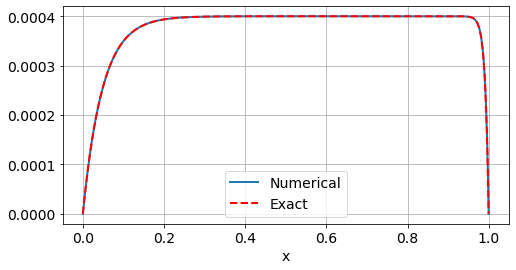

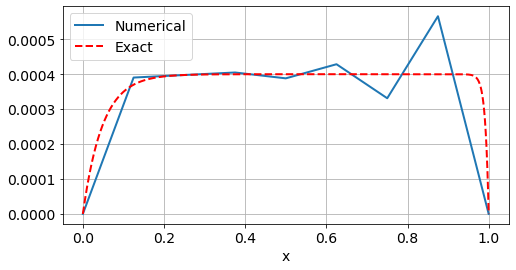

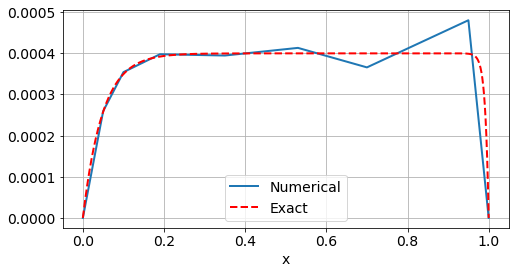

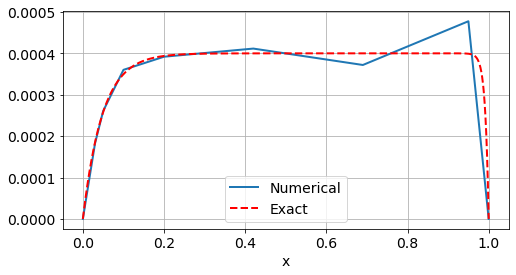

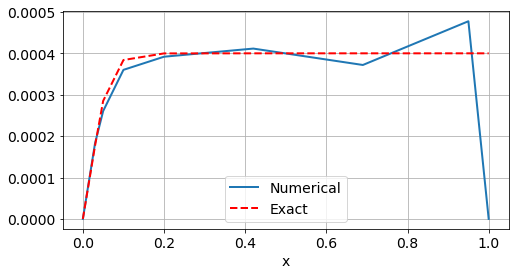

In [32]:
counter=0
def plotter3(U, Xk, U_ex, Xk_ex,counter):
    plt.plot(Xk,U,Xk_ex, U_ex,'r--')
    plt.legend(['Numerical','Exact'])
    plt.xlabel('x')
    plt.savefig('plot3'+str(counter)+'.pdf')
    plt.show()
    return 0

def main3():
    U, U2,U3, U4,Xk,Xk_2,Xk_3, Xk_4,U_der=solver3()
    plotter3(U,Xk,U,Xk,1)
    plotter3(U4,Xk_4,U,Xk,2)
    plotter3(U2,Xk_2,U,Xk,3)
    plotter3(U3,Xk_3,U,Xk,4)
    plotter3(U3,Xk_3,exact_sol_e(Xk_3),Xk_3,5)

    

main3()
